In [1]:
#importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import rasterio as rst
from rasterio.transform import from_origin

In [ ]:
# funciones de vulnerabilidad

In [ ]:
#funciones 


class vul_model:

    #constructor:
    def __init__(self, direccion):

        
        vul_model.direccion = direccion
        vul_model.arr = [f for f in os.listdir(direccion) if f.endswith('.tif')]

        #se cargan los rasters al modelo:
        print('cargando capas...')
        vul_model.rasters=[]

        for i in vul_model.arr: 
            self.dir= vul_model.direccion+'/'+i
            print('cargando: ', self.dir)
            vul_model.rasters.append( rst.open(self.dir).read(1))
        

        #get min values for rasters 
        self.shapes0=[]
        self.shapes1=[]
        for i in vul_model.rasters:
            self.shapes0.append(i.shape[0])
            self.shapes1.append(i.shape[1])
        vul_model.min1=min(self.shapes0)
        vul_model.min2=min(self.shapes1) 

        #filter raster
        print('filtrando rasters...')
        for i in range(0,len(vul_model.rasters)):
            vul_model.rasters[i]=vul_model.rasters[i][0:vul_model.min1,0:vul_model.min2]
        
        #get bounds
        print('obteniendo limites...')
        a=rst.open(vul_model.direccion +'/'+vul_model.arr[0])
        vul_model.bounds=[0,0]
        vul_model.bounds[0] = a.bounds[3]
        vul_model.bounds[1] = a.bounds[0] 

        print('carga finalizada...')


    #ver la lista de rasters cargados
    def print_raster_list(self):
        for i in vul_model.arr:
            print(i)


    #agregar la tabla de ponderaciones
    #path: direccion de la carpeta donde estan los rasters para hacer el analisis 
    def add_analisis(self, path): 
 
        vul_model.pond_table = pd.read_csv(path,encoding = 'unicode_escape')


    #cambiar ponderacion:
    #rast: es el raster al que se le cambia la ponderacion, formato str
    #pond: es la nueva ponderacion
    def pond_change(self, rast , pond): 
        vul_model.pond_table.loc[rast,'ponderacion'] = pond

    #imprimir solo un raster
    #rast_num: numero del raster que se desea graficar
    def plt_raster(sel, rast_num):   
        plt.figure(figsize = (30,20))
        plt.imshow(vul_model.rasters[rast_num])
        plt.colorbar()
        plt.show()

    #imprimir todos los rasters
    def print_all(self):
        self.col=3
        self.row= (int(len(vul_model.rasters)/3))+1

        fig, self.axs = plt.subplots(self.row, self.col,figsize=(15,15))

        self.nn = 0 

        for i in range(0,self.row):
            for j in range(0,self.col):

                if self.nn >len(vul_model.rasters)-1: 
                    break
                else:
                    self.axs[i,j].imshow(vul_model.rasters[self.nn])
                    self.axs[i,j].set_title(self.nn)
                    self.nn=self.nn+1

    #correr el analisis
    def run_raster_sum(self):

        vul_model.suma = np.zeros(vul_model.rasters[0].shape ,dtype=float)

        r= vul_model.pond_table.index
        p= vul_model.pond_table['ponderacion']
        for i in r:
            vul_model.suma = vul_model.suma + (vul_model.rasters[i] * p[i])
        print('raster_calc completa')

    #graficar el analisis
    def plt_sum(self):
        plt.figure(figsize = (30,20))
        plt.imshow(vul_model.suma)
        plt.colorbar()
        plt.show()


    #exportar el analisis
    #name: nombre del archivo de salida raster con todo y su extencion *.tif
    def exportar_raster(self,name):  

        self.path=vul_model.direccion+'/'+name
        transform = from_origin(vul_model.bounds[1],vul_model.bounds[0], 5, 5)

        new_dataset = rst.open(self.path, 
                                'w', 
                                driver='GTiff',
                                height = vul_model.suma.shape[0], 
                                width = vul_model.suma.shape[1],
                                count=1, 
                                dtype=str(vul_model.suma.dtype),
                                crs='+proj=utm +zone=11 +datum=WGS84 +units=m +no_defs' ,
                                transform=transform)

        new_dataset.write(vul_model.suma, 1)
        new_dataset.close()
        print('exportacion completa')









In [2]:
#insertamos el path

path ='C:/Users/SIG01/Documents/IMPLAN/procesos/modelo de vulnerabilidad/rasters/analisis de prueba/'


carpetas = []
p=os.listdir(path)
for i in p: 
    if os.path.isdir(path+i): 
        carpetas.append(i)

carpetas




['quimico', 'sanitario', 'socio organizativa']

In [3]:
#importamos los datos
rr =[]

r_names =[]

for k in range(0,len(carpetas)):
    print('cargando capas de: '+ carpetas[k])
    print('  ')
    r = []
    r_n = []
    path2 = path + carpetas[k]
    archivos = os.listdir( path2)
    for i in range(0,len(archivos)):

        print('cargando: '+path + path2+ '/' +archivos[i])
        r_n.append(archivos[i])
        r.append( rst.open(path2+ '/' +archivos[i]).read(1))

    r_names.append(r_n)
    rr.append(r)
print('ha terminado la carga')

cargando capas de: quimico
  
cargando: C:/Users/SIG01/Documents/IMPLAN/procesos/modelo de vulnerabilidad/rasters/analisis de prueba/C:/Users/SIG01/Documents/IMPLAN/procesos/modelo de vulnerabilidad/rasters/analisis de prueba/quimico/quim_EMPRESAS_SUSTANCIAS_PEL.tif
cargando: C:/Users/SIG01/Documents/IMPLAN/procesos/modelo de vulnerabilidad/rasters/analisis de prueba/C:/Users/SIG01/Documents/IMPLAN/procesos/modelo de vulnerabilidad/rasters/analisis de prueba/quimico/quim_ESTACION_CARBURACION.tif
cargando: C:/Users/SIG01/Documents/IMPLAN/procesos/modelo de vulnerabilidad/rasters/analisis de prueba/C:/Users/SIG01/Documents/IMPLAN/procesos/modelo de vulnerabilidad/rasters/analisis de prueba/quimico/quim_ESTACION_HIDROCARB_ALMACEN.tif
cargando: C:/Users/SIG01/Documents/IMPLAN/procesos/modelo de vulnerabilidad/rasters/analisis de prueba/C:/Users/SIG01/Documents/IMPLAN/procesos/modelo de vulnerabilidad/rasters/analisis de prueba/quimico/quim_ESTACION_HIDROCARB_MEDYREG.tif
cargando: C:/Users/

In [4]:
#filtramos los rasters

shapes0=[]
shapes1=[]

for k in range(0,len(rr)):
    for i in rr[k]:
        shapes0.append(i.shape[0])
        shapes1.append(i.shape[1])

min1=min(shapes0)
min2=min(shapes1)


print(min1)
print(min2)


print('filtrando rasters...')

for k in range(0,len(rr)):
    for i in range(0,len(rr[k])):

        rr[k][i] = rr[k][i][0:min1,0:min2]
print('filtrados...')

2842
3248
filtrando rasters...
filtrados...


In [ ]:
def plot_raster(raster, subcarp, rast):
    plt.figure(figsize = (30,20))
    plt.imshow(raster[subcarp][rast])
    plt.colorbar()
    plt.show()

In [ ]:
plot_raster(rr,1,3)

In [6]:
#acomodamos los rasters en diferentes dataframes y estos DF en una lista

frames = []

for k in range(0,len(rr)):
    frames.append( pd.DataFrame(index=range(0,len(rr[k])), columns = ['rasters','rast_name','pond'] ))
    frames[k]['rasters'] = rr[k]
    frames[k]['rast_name'] = r_names[k]
    


In [7]:
frames[2]

,rasters,rast_name,pond
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",so_D_DENSIDAD.tif,NaN
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",so_F_AGEB_GRS_2020.tif,NaN
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",so_F_POBREZA.tif,NaN


In [8]:

# generamos las ponderaciones y las agreegamos al dataframe

frames[0]['pond'] = [1,1,1,1,1,1,1,1,1,1]
frames[1]['pond'] = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
frames[2]['pond'] = [ 20,20,60]

gen_pond = [25,42,33]
frames[2]

,rasters,rast_name,pond
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",so_D_DENSIDAD.tif,20
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",so_F_AGEB_GRS_2020.tif,20
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",so_F_POBREZA.tif,60


In [9]:
#creamos otro dataframe que alojara las sumas de cada sub data frame

frames_sum = pd.DataFrame(columns = ['raster sum', 'pond','categoria'])
frames_sum['pond'] = gen_pond
frames_sum['categoria'] = carpetas
frames_sum

,raster sum,pond,categoria
0,NaN,25,quimico
1,NaN,42,sanitario
2,NaN,33,socio organizativa


In [10]:
#suma de sub data frames

sum = np.zeros(frames[0]['rasters'][0].shape,dtype=float)

for i in range(0,len(frames)): 
    for j in range(0,len(frames[i])):
        sum = sum + (frames[i]['rasters'][j] * frames[i]['pond'][j] )
        frames_sum['raster sum'][j] = sum

frames_sum

C:\Users\SIG01\AppData\Local\Temp/ipykernel_4456/2261348943.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frames_sum['raster sum'][j] = sum


,raster sum,pond,categoria
0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",25,quimico
1,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",42,sanitario
2,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",33,socio organizativa


In [11]:
#normalizador de datos 

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [12]:
#normalizar datos

for i in range (0, len(frames_sum )):

    print(max(np.amax(frames_sum['raster sum'][i], axis=0)))  
    print('             ')

    frames_sum['raster sum'][i] = NormalizeData(frames_sum['raster sum'][i])

    print(max(np.amax(frames_sum['raster sum'][i], axis=0)))  
    print('--------------------------------')


26.0
             


C:\Users\SIG01\AppData\Local\Temp/ipykernel_4456/502324944.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frames_sum['raster sum'][i] = NormalizeData(frames_sum['raster sum'][i])


1.0
--------------------------------
46.0
             
1.0
--------------------------------
103.0
             
1.0
--------------------------------


In [13]:
# suma de data frames 

g_sum = np.zeros(frames_sum['raster sum'][0].shape,dtype=float)
for i in range(0,len(frames_sum)): 
    g_sum = g_sum + (frames_sum['raster sum'][i] * frames_sum['pond'][i] )
    frames_sum['raster sum'][i] = g_sum
g_sum = NormalizeData(g_sum)
g_sum

C:\Users\SIG01\AppData\Local\Temp/ipykernel_4456/3925915497.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frames_sum['raster sum'][i] = g_sum


array([[0.02221062, 0.02221062, 0.02221062, ..., 0.        , 0.        ,
        0.        ],
       [0.02221062, 0.02221062, 0.02221062, ..., 0.        , 0.        ,
        0.        ],
       [0.02221062, 0.02221062, 0.02221062, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

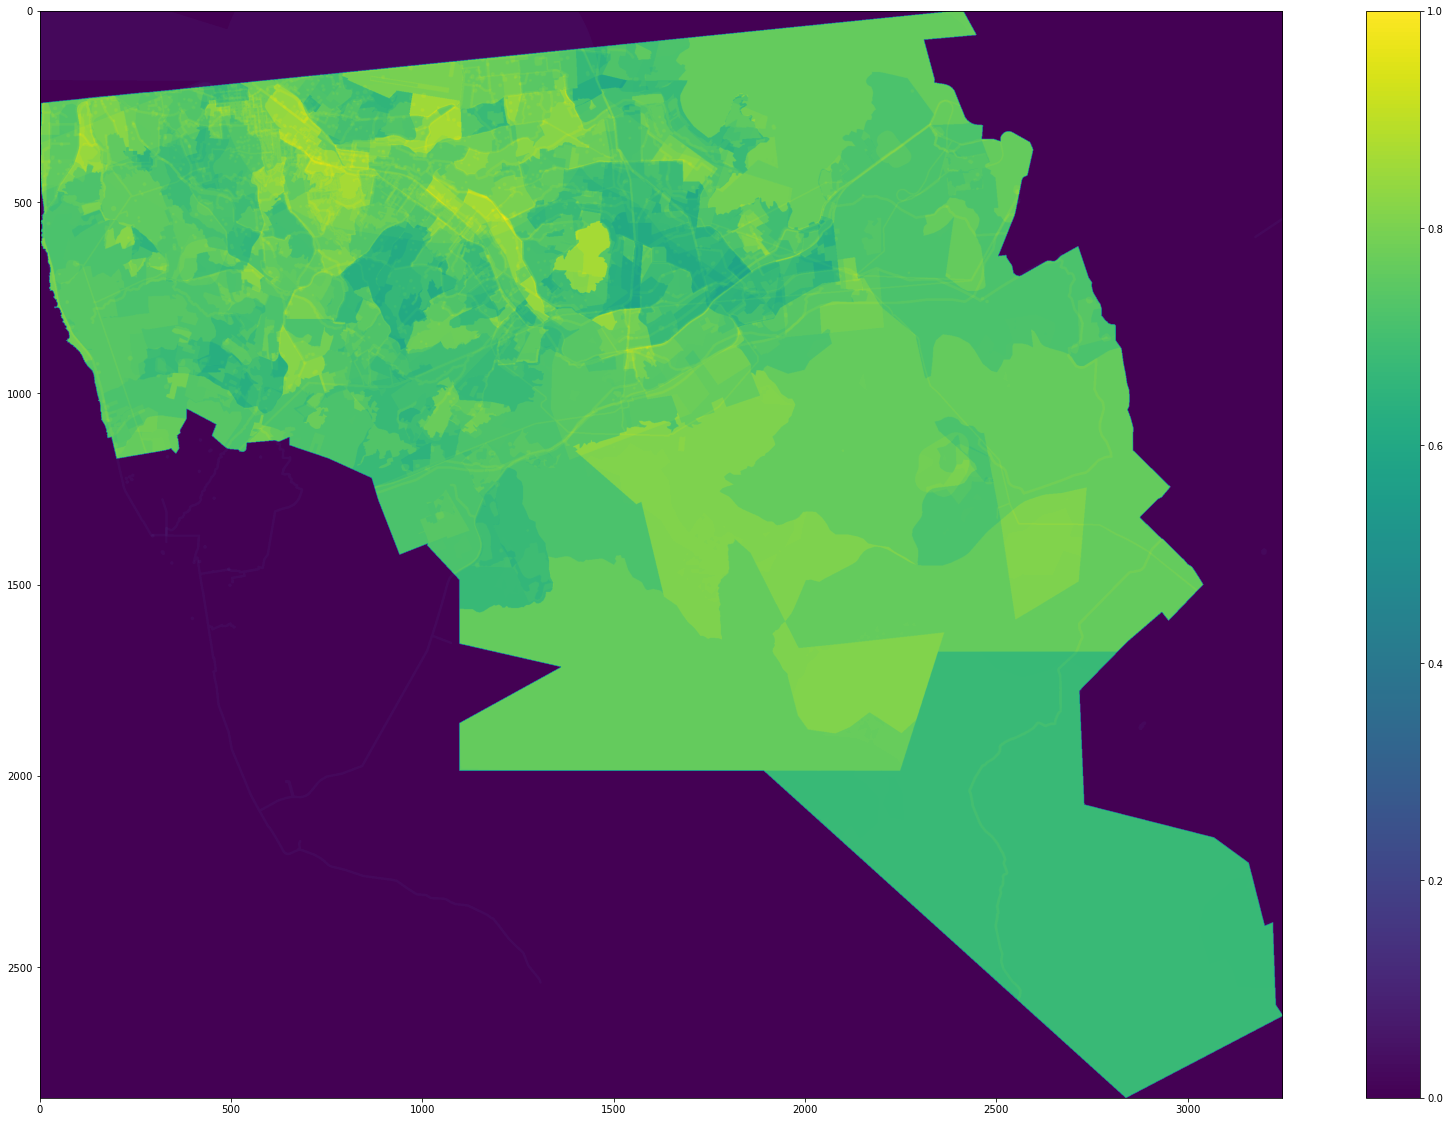

In [14]:
plt.figure(figsize = (30,20))
plt.imshow(g_sum)
plt.colorbar()
plt.show()

In [ ]:
# exportar rasster dfinal

name = 'salida_2.tif'
a=rst.open( path2+'/'+archivos[0]  )
bounds=[0,0]
bounds[0] = a.bounds[3]
bounds[1] = a.bounds[0] 

path3=path+'/'+name

transform = from_origin(bounds[1],bounds[0], 15, 15)

new_dataset = rst.open(path3, 
                        'w', 
                        driver='GTiff',
                        height = g_sum.shape[0], 
                        width = g_sum.shape[1],
                        count=1, 
                        dtype=str(g_sum.dtype),
                        crs='+proj=utm +zone=11 +datum=WGS84 +units=m +no_defs' ,
                        transform=transform)

new_dataset.write(g_sum, 1)
new_dataset.close()
print('exportacion completa')
